In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Dimensionality reduction for classification tasks

In [8]:
mnist = pd.read_csv("data/mnist1.5k.csv.gz", compression="gzip", header=None).values
d=mnist[:,1:785]
c=mnist[:,0]
print "dimension de las imagenes y las clases", d.shape, c.shape

dimension de las imagenes y las clases (1500, 784) (1500,)


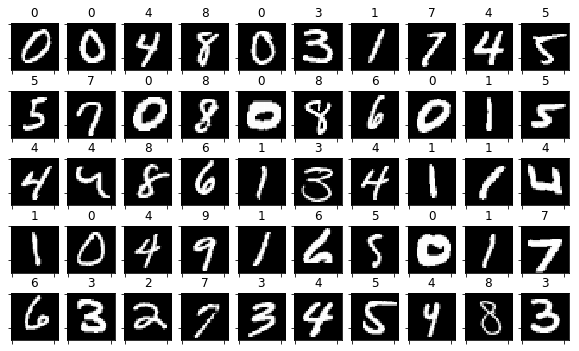

In [9]:
perm = np.random.permutation(range(d.shape[0]))[0:50]
random_imgs   = d[perm]
random_labels = c[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

## Principal Component Analysis

In [10]:
from sklearn.decomposition import PCA

mnist = pd.read_csv("data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]
y=mnist[:,0]

pca = PCA(n_components=60)
Xp = pca.fit_transform(X)


### obtain principal components

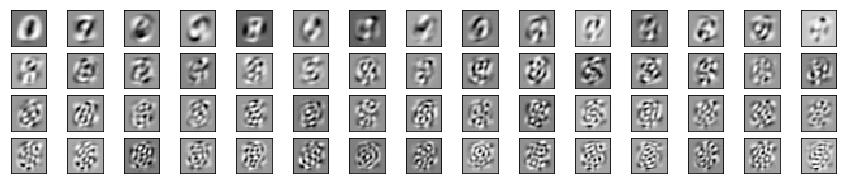

In [11]:
cols=20
plt.figure(figsize=(15,3))
for i in range(len(pca.components_)):
    plt.subplot(np.ceil(len(pca.components_)/15.),15,i+1)
    plt.imshow((pca.components_[i].reshape(28,28)), cmap = plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

### verify reconstruction from pricipal components

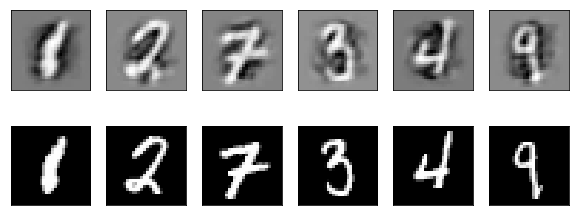

In [12]:
plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(3,6,i+1)
    k = np.random.randint(len(X))
    plt.imshow((np.sum((pca.components_*Xp[k].reshape(-1,1)), axis=0)).reshape(28,28), cmap=plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])
    plt.subplot(3,6,6+i+1)
    plt.imshow(X[k].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

### classification in the new representation space

In [13]:
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import GaussianNB

print np.mean(cross_val_score(GaussianNB(), X,y, cv=5 ))
print np.mean(cross_val_score(GaussianNB(), Xp,y, cv=5 ))

/Volumes/sdcard/opt/conda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.5919753397822902
0.8394380815656837


### observe new representation of first image 

In [14]:
Xp[0]

array([-6.30215314e+02,  7.30971027e+02, -1.03800335e+02, -9.67497276e+01,
       -1.47337990e+02, -4.69261609e+02, -4.11866456e+02, -6.03643904e+02,
        1.63463615e+02, -2.44034698e+02, -2.64691195e+02, -7.50383772e+00,
       -9.33975171e+01, -3.15314346e+02,  2.99180902e+02,  4.32868229e+01,
       -1.46622695e+01,  3.73484513e+02,  1.73243499e+02, -6.94084879e+01,
        8.76460728e+01, -2.71778733e+02,  3.22507786e+01, -2.67179529e+00,
        1.46245631e+02, -1.94556890e+02, -6.74505164e+00, -1.30694851e+02,
        2.79146510e+02, -7.97554084e+01, -4.48316763e+01,  1.12900498e+02,
        2.39590699e+01,  1.72092494e+02,  1.13207799e+02, -1.36908216e+02,
       -1.02918478e+02,  1.49154653e+01, -2.43662295e+02,  8.57114559e+01,
        5.33512322e+01, -6.18609399e+00, -1.27420630e+02,  1.61619680e+02,
        5.79331017e+01, -4.68856565e+01,  2.53050711e+01,  4.40752626e+01,
       -1.13841418e+02,  2.26639248e+01,  1.09169225e+02, -8.35617388e+01,
        1.21452163e+02,  

### pipelines

we must be careful when using these transformation in classification, as we should compute them (although in an unsupervised manner) only on train data

In [23]:
from sklearn.pipeline import Pipeline
pip = Pipeline([("PCA", PCA(n_components=60)), ("gaussian", GaussianNB())])
print np.mean(cross_val_score(pip, X,y, cv=5 ))

0.8434577988737979


## Singular Value Decomposition

$$\mathbf{X} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^*$$ 

where:

- $\mathbf{X}$ is our data
- $\mathbf{U}$ is unitary (its rows and columns are orthonormal, forming a basis)
- $\mathbf{V}^*$ is unitary (is rows and  columns are orthonormal, forming a basis)

In [41]:
U,s,V = np.linalg.svd(X)

In [42]:
U.shape, s.shape, V.shape

((1500, 1500), (784,), (784, 784))

reconstruct diagonal matrix s

In [43]:
s = np.diag(s)
s = np.vstack([s, np.zeros((U.shape[0]-s.shape[0], s.shape[1]))])

(1500, 784)

check SVD properties. 

In [74]:
print "checking U is unitary:         ", np.allclose(U.dot(U.T), np.eye(U.shape[0]))
print "checking rows in U are unit:   ", np.allclose(np.linalg.norm(U, axis=1), np.ones(U.shape[0]))
print "checking columns in U are unit:", np.allclose(np.linalg.norm(U, axis=0), np.ones(U.shape[1]))
print "checking V is unitary:         ", np.allclose(V.T.dot(V), np.eye(V.shape[0]))
print "checking rows in V are unit:   ", np.allclose(np.linalg.norm(V, axis=1), np.ones(V.shape[0]))
print "checking columns in V are unit:", np.allclose(np.linalg.norm(V, axis=0), np.ones(V.shape[1]))
print "checking X reconstruction:     ", np.allclose(U.dot(s).dot(V), X)


checking U is unitary:          True
checking rows in U are unit:    True
checking columns in U are unit: True
checking V is unitary:          True
checking rows in V are unit:    True
checking columns in V are unit: True
checking X reconstruction:      True


$\Sigma$ is ordered and each coeficcient quantifies how much each basis in $V$ contributes to the variability of the original data

Text(0,0.5,u'component value')

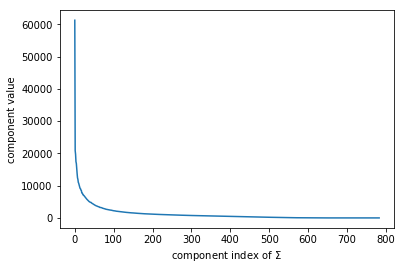

In [78]:
plt.plot(np.diagonal(s))
plt.xlabel("component index of $\Sigma$");
plt.ylabel("component value")

### observe that the components of PCA and $V^*$ from SVD are the same

although sometimes might come up with different sign

In [108]:
Xm = X-np.mean(X, axis=0)
U,s,V = np.linalg.svd(Xm)
pca = PCA(n_components=60)
pca.fit(Xm);

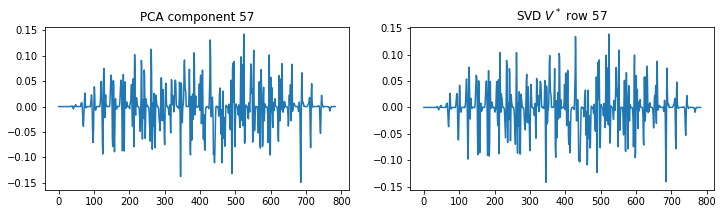

In [110]:
i = np.random.randint(pca.n_components)
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.plot(pca.components_[i])
plt.title("PCA component %d"%i)
plt.subplot(122)
plt.title("SVD $V^*$ row %d"%i)
plt.plot(V[i])

for instance if we what to keep the SVD base vector to account for up to 40% of the variability

In [125]:
n_components = np.argwhere(np.cumsum(s)/np.sum(s)>.4)[0][0]
print "keeping %d components"%n_components

keeping 39 components


In [126]:
c = V[:n_components]

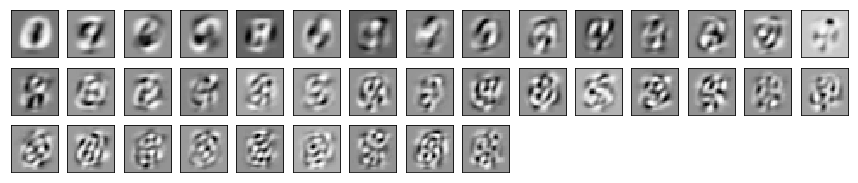

In [127]:
cols=20
plt.figure(figsize=(15,3))
for i in range(len(c)):
    plt.subplot(np.ceil(len(c)/15.),15,i+1)
    plt.imshow((c[i].reshape(28,28)), cmap = plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

which correspond to the same components above for PCA.

## Non negative matrix factorization

Descomponemos una matriz $V \in \mathbb{R}_+^{m\times n}$ en el producto $W \times H$, con $W \in \mathbb{R}_+^{m\times r}$ y $H \in \mathbb{R}_+^{r\times n}$ con la restricción de que todo sea positivo ($\in \mathbb{R}_+$), de forma que:

$$V \approx W \times H$$

Las filas de $H$ son los _componentes base_, y se soluciona planteándolo como un problema de optimización matemática con restricciones.

$$\begin{split}
argmin_{W,H}\;& ||V-W\times H||\\
s.t.&\;W,H \in \mathbb{R}_+
\end{split}$$

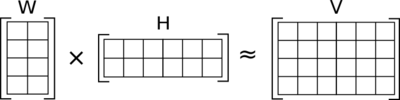

In [9]:
from IPython.display import Image
Image(filename='imgs/nmf.png')

### obtain decomponsition

In [10]:
from sklearn.decomposition import NMF
X=mnist[:,1:785]; y=mnist[:,0]

nmf = NMF(n_components=15, init="random")
Xn  = nmf.fit_transform(X)

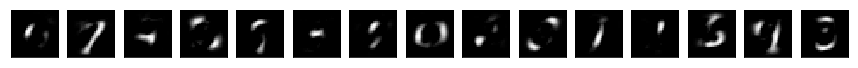

In [11]:
cols=20
plt.figure(figsize=(15,3))
for i in range(len(nmf.components_)):
    plt.subplot(len(nmf.components_)/15,15,i+1)
    plt.imshow(np.abs(nmf.components_[i].reshape(28,28)), cmap = plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

In [12]:
Xn[0,:]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   1.70975508,   0.13692817,   0.        ,
         8.59060053,  13.69469474,   3.67289201,   8.465359  ,
         0.        ,   0.        ,   0.        ])

### check reconstruction

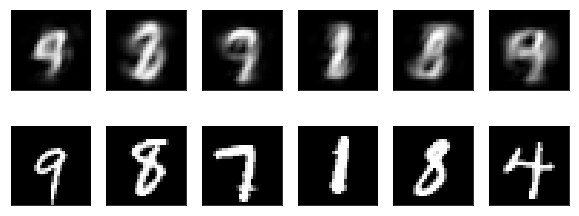

In [13]:
plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(3,6,i+1)
    k = np.random.randint(len(X))
    plt.imshow(np.abs(np.sum((nmf.components_*Xn[k].reshape(-1,1)), axis=0)).reshape(28,28), cmap=plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])
    plt.subplot(3,6,6+i+1)
    plt.imshow(X[k].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

### classification in the new representation space

In [14]:
print np.mean(cross_val_score(GaussianNB(), X,y, cv=5 ))
print np.mean(cross_val_score(GaussianNB(), Xn,y, cv=5 ))

0.591975339782
0.778061858065


### first image in new representation space
observe all components are positive

In [15]:
Xn[0]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   1.70975508,   0.13692817,   0.        ,
         8.59060053,  13.69469474,   3.67289201,   8.465359  ,
         0.        ,   0.        ,   0.        ])

## NMF for face recognition

In [1]:
import pickle
faces = pickle.load( open( "data/faces.pkl", "rb" ) )
faces.shape

(535, 361)

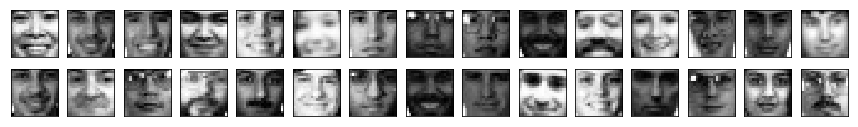

In [4]:
plt.figure(figsize=(15,2))
for i in range(30):
    plt.subplot(2,15,i+1)
    plt.imshow(faces[np.random.randint(len(faces))].reshape(19,19), cmap=plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

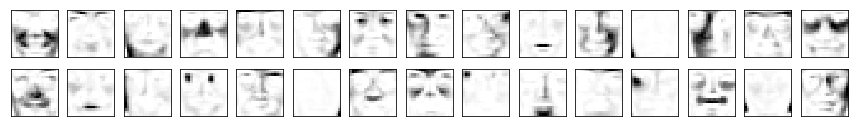

In [19]:
nmf      = NMF(n_components=30, init="random")
faces_n  = nmf.fit_transform(faces)
cols=20
plt.figure(figsize=(15,2))
for i in range(len(nmf.components_)):
    plt.subplot(np.ceil(len(nmf.components_)/15.),15,i+1)
    plt.imshow(np.abs(nmf.components_[i].reshape(19,19)), cmap = plt.cm.Greys)
    plt.xticks([]); plt.yticks([])

forcing sparseness in the components. extend the optimization problem with the $L_1$ norm on the base components:

$$\begin{split}
argmin_{W,H}\;& ||V-W\times H|| + ||H||^2_1\\
s.t.&\;W,H \in \mathbb{R}_+
\end{split}$$

we could also force sparness in the new representation
$$\begin{split}
argmin_{W,H}\;& ||V-W\times H|| + ||W||^2_1\\
s.t.&\;W,H \in \mathbb{R}_+
\end{split}$$


/opt/anaconda/lib/python2.7/site-packages/sklearn/decomposition/nmf.py:997: DeprecationWarning: Controlling regularization through the sparseness, beta and eta arguments is only available for 'pg' solver, which will be removed in release 0.19. Use another solver with L1 or L2 regularization instead.
  " regularization instead.", DeprecationWarning)


24130.9737149


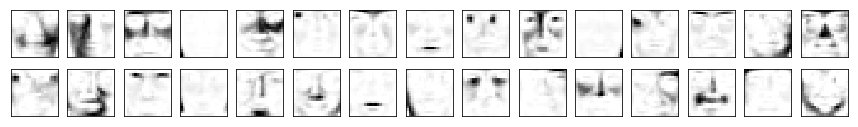

In [20]:
nmf      = NMF(n_components=30, init="nndsvd", sparseness="components", eta=1e5, l1_ratio=1, beta=100.)
faces_n  = nmf.fit_transform(faces)
cols=20
plt.figure(figsize=(15,2))
print np.sum(nmf.components_)
for i in range(len(nmf.components_)):
    plt.subplot(np.ceil(len(nmf.components_)/15.),15,i+1)
    plt.imshow(np.abs(nmf.components_[i].reshape(19,19)), cmap = plt.cm.Greys)
    plt.xticks([]); plt.yticks([])